Load data

In [5]:
import Data.data_provider as dp
import numpy as np

features, target = dp.load_data('fashionMnist')
features = np.reshape(features, (-1,28,28,1))
# features = features.transpose([0,2,3,1])

features.shape

(70000, 28, 28, 1)

Visualize images

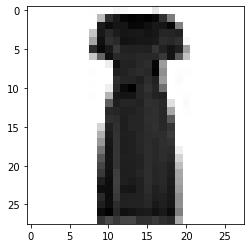

In [6]:
import matplotlib.pyplot as plt

plt.imshow(features[50], cmap=plt.cm.binary)

Train test calib split

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

x_train, x_test_all, y_train, y_test_all = train_test_split(features, target, test_size=0.4, shuffle=True, random_state=1)
x_test, x_calib, y_test, y_calib = train_test_split(x_test_all, y_test_all, test_size=0.5, shuffle=True, random_state=1) 


Train Network

In [ ]:
# # Normalize data
# x_train = tf.keras.utils.normalize(x_train, axis=1)
# x_test = tf.keras.utils.normalize(x_test, axis=1)

# Create model
model = tf.keras.models.Sequential()

# Add layers
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

# Layer
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

# Layer
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
    
# Train the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=128, shuffle=True, epochs=10)


Load pretrained network

In [ ]:
print("loading model path: ", "Models/calibtest")
model = tf.keras.models.load_model("Models/calibtest")
